
## 📌 **K-Means Clustering – With Real-Life Example**

### 🔹 What is K-Means?

* **K-Means** is an **unsupervised machine learning algorithm**.
* It is used to **group similar data points** into clusters.
* It works on **unlabeled data** — no predefined categories.

---

### 📺 **Real-Life Example: Netflix Recommendations**

Let’s say Netflix wants to **group users** based on their **watching habits**:

* Some users love **action movies**
* Some prefer **romantic dramas**
* Others watch **comedy shows**, etc.

Netflix uses **K-Means Clustering** to **group users** into **clusters** based on:

* Genre preferences
* Watch time
* Ratings given
* Language or region

➡️ Then, Netflix recommends **movies from the user's cluster**, as they’re more likely to enjoy them.

---

### 🔧 **How It Works (Simple Terms)**

1. Netflix defines **K = 3 clusters** (Action Lovers, Drama Lovers, Comedy Lovers).
2. It analyzes users’ watch history.
3. It groups similar users into clusters using **distance**:

   * **Less distance = more similar**
   * **More distance = less similar**
4. Users in the same cluster get similar recommendations.

---

### 📏 **How is Similarity Measured?**

* K-Means uses **Euclidean distance**.
* It calculates the distance between user behaviors.
* If two users have similar watch patterns, their distance is small → Same cluster.

---

### ✅ Summary

| Term              | Meaning                                           |
| ----------------- | ------------------------------------------------- |
| **Unsupervised**  | No labeled output (like genres manually assigned) |
| **Cluster**       | Group of similar users or items                   |
| **Distance**      | Basis for similarity                              |
| **Real-life Use** | Netflix, Spotify, YouTube, Shopping sites         |



## Clustering

Let’s suppose we give a child different objects to group. How does a child make a group? The child may group over the colour, over the shape, over the hardness or softness of the objects etc. The basic idea here is that the child tries to find out similarities and dissimilarities between different objects and then tries to make a group of similar objects. This is called **clustering**, the method of identifying similar instances and keeping them together.
In Other words, clustering identifies homogeneous subgroups among the observations.


Clustering is an unsupervised approach which finds a structure/pattern in a collection of unlabeled data.
A cluster is a collection of objects which are “similar” amongst themselves and are “dissimilar” to the objects belonging to a different cluster.
For example:


<img src="https://summerofhpc.prace-ri.eu/wp-content/uploads/2013/07/k-means_ilustration.png">


In the figure above, we can easily identify 4 different clusters. The clustering criteria here is distance. Whichever points are near to each other are kept in the same cluster and the faraway points belong to a different cluster

# KMeans Clustering

It is an unsupervised technique used to identify clusters of data objects in the dataset. K specifies the number of clusters.

Steps involved in K-Means Algorithm:

1. Initially choose the number of K clusters.

2. Start with K centroids by putting them at random place (not necessarily from your dataset). **A centroid is a data point (imaginary or real) at the center of a cluster.**

3. Assign each point to the closest centroid. That forms k cluster. Compute distance of every point from centroid.

4. Compute and place the new centroid for each cluster ie., calculate the mean value of the objects for each cluster and update the cluster mean.

5. Repeat the process again ie., reassign each data point to the new closest centroid. If any reassignment took place, go to step 4. But if there is no change ie., when clusters form a clear boundary, then stop.





### Problem Statement

Implementation of Kmeans using iris data

In [17]:
# load the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [18]:
# load the data
data = pd.read_csv('iris.csv')

In [19]:
data

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


### Domian Analysis

- Speak about all the input clumns 

- speak about the target

- if possible speak how input col act against the target

### Basic  checks

In [20]:
# drop the unamed0
data.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [21]:
data.shape

#150 rows , 5 columns

(150, 5)

In [22]:
data.head()
# gives first 5 rows of the data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
data.tail()
# last 5 rows of the data

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [24]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [25]:
data.dtypes
#all the columns are numerical columns

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [26]:
data.info()
# gives entire description about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [27]:
data.describe()
# will give us the statistical analysis about the data

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [28]:
# analyse the target column since it is descrete
data['target'].unique()

array([0, 1, 2], dtype=int64)

In [29]:
data['target'].value_counts #its balance data equal number of rows info we have

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64>

In [30]:
# by analysing the target col, i.e getting the value_counts()
# we get to know whther the dataset is balanced or not
# here , out datastet is balanced, since we have equal number of rows of info 
# belonging to each class


### EDA

<Axes: xlabel='petal_length', ylabel='petal_width'>

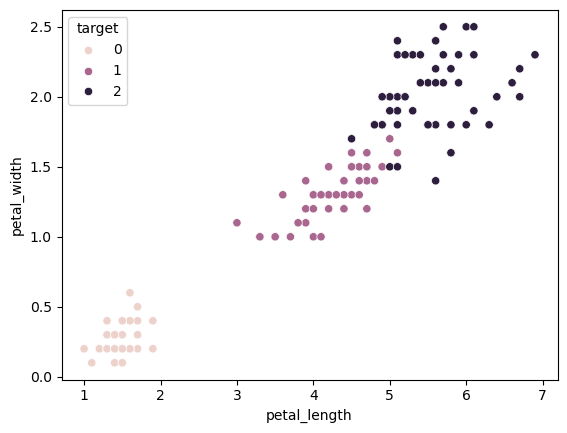

In [31]:
sns.scatterplot(x=data['petal_length'],y=data['petal_width'], hue=data['target']) #when we want compare then we use scattlr

### Preprocessing

In [32]:
## null values
data.isnull().sum()

# the data has no missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [33]:
# duplicates
data.duplicated().sum()

# we have 3 duplicate values, we'll drop them

3

In [34]:
data = data.drop_duplicates() #reomve duplicates record from the table

In [35]:
data.duplicated().sum()

0

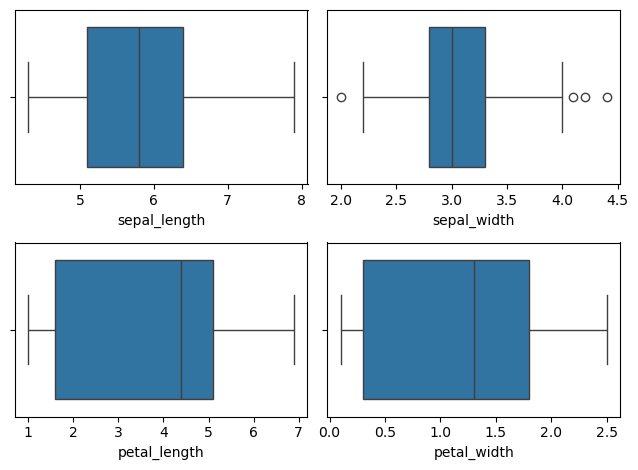

In [36]:
# outliers
plot = 1
for i in data.drop('target',axis=1):
    if plot <= 4:
        ax = plt.subplot(2,2,plot) #2,2 means 2 in coulum and row
        sns.boxplot(x=data[i])
        plt.xlabel(i)
    plot+=1
plt.tight_layout() # get clear cluster 



### ✅ When to Use What?

1. \*\*When we have ***not normal distribution***:
   👉 We use **Median**, **IQR**, or **Robust Scalers**
   (because **mean and standard deviation** are affected by outliers and skewed data)

---

2. **When we have normal distribution (with outliers)**:
   👉 We use the **3-sigma rule (Empirical Rule)**:

$$
\mu \pm 3\sigma
$$

* **μ (mu)** = mean
* **σ (sigma)** = standard deviation
* Covers **99.7%** of the data
* Useful to detect **outliers**:
  If a data point is **beyond μ ± 3σ**, it's likely an **outlier**.



<Axes: ylabel='Density'>

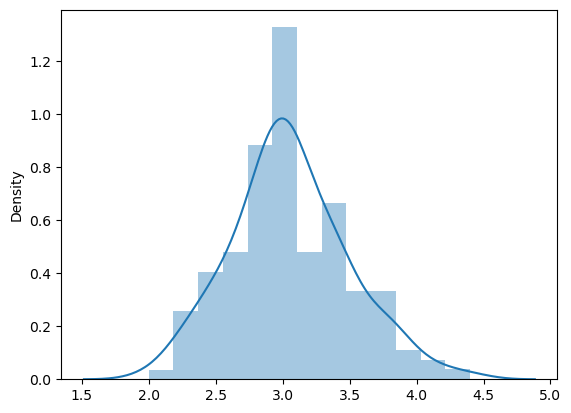

In [37]:
# the sepal width column has outliers
sns.distplot(x=data['sepal_width'])

# when we have not normal distrubition   we use ____ 
# when outliers  normal distribution we use 3 sigma  mue + 3 sigma 

In [38]:
#  the distribution gives normal
# since the data has shown normal distribution , we go with 3 sigma
# mean - 3 sigma
lower = data['sepal_width'].mean() - 3 * data['sepal_width'].std() # std = Sigma   why we use because its normal distrubtion data and ouliters is there
lower # any value less than 1.7 its outlier    
# for uper limit must be 10% and lower 5%

1.7447561925148642

In [39]:
lower = data['sepal_width'].median() - 3 * data['sepal_width'].std() # std = Sigma   why we use because its normal distrubtion data and ouliters is there
lower

1.6889738795896942

In [40]:
# mean + 3 sigma
upper =  data['sepal_width'].mean() + 3 * data['sepal_width'].std()
upper

4.366808433335476

In [41]:
data.loc[data['sepal_width'] < lower]
#there is no value in the col below the lower limit

,sepal_length,sepal_width,petal_length,petal_width,target


In [42]:
data.loc[data['sepal_width'] > upper]

# there is one data point

,sepal_length,sepal_width,petal_length,petal_width,target
15,5.7,4.4,1.5,0.4,0


In [43]:
# after getting the rows of information
# calculate the % of outliers of that col


(len(data.loc[data['sepal_width'] > upper])/len(data))*100

0.6802721088435374

In [44]:
#we'll replace the outliers by mean of the col
data.loc[data['sepal_width']>upper, 'sepal_width'] = data['sepal_width'].mean()

In [45]:
data.loc[data['sepal_width'] > upper]

,sepal_length,sepal_width,petal_length,petal_width,target


### MOdel building

In [46]:
data.drop('target',axis=1,inplace=True)

In [47]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
# input data for the model
x = data
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Scaling to be applied to entire X 

- The entire X is considered as input data

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [50]:
x= pd.DataFrame(sc.fit_transform(x), columns = x.columns)

In [51]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,-0.915509,1.076685,-1.357737,-1.335700
1,-1.157560,-0.110760,-1.357737,-1.335700
2,-1.399610,0.364218,-1.414778,-1.335700
3,-1.520635,0.126729,-1.300696,-1.335700
4,-1.036535,1.314174,-1.357737,-1.335700
...,...,...,...,...
142,1.020892,-0.110760,0.809831,1.444682
143,0.536792,-1.298205,0.695748,0.915085
144,0.778842,-0.110760,0.809831,1.047484
145,0.415766,0.839196,0.923913,1.444682


### How to get the precise K value

#### Elbow method

Elbow method is the most popular method that is used to determine the optimal value of k.

**How it works?**

- Start with some K.
- Calculate WCSS (Within Cluster Sum of squared errors) ie., for each of the cluster, it calculate the distance of individual data points from the centroid, then square it and sum it up.
             WCSS = WCSS1 + WCSS2 + ..... WCSSk
             
- Take new value for K, repeat step2.
- For each number of K, WCSS is calculated.
- Find the elbow point. That is the optimal value of K.

[WCSS.png](attachment:WCSS.png)
 As the number of K increases, the error reduces.



In [52]:
from sklearn.cluster import KMeans

In [53]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,-0.915509,1.076685,-1.357737,-1.335700
1,-1.157560,-0.110760,-1.357737,-1.335700
2,-1.399610,0.364218,-1.414778,-1.335700
3,-1.520635,0.126729,-1.300696,-1.335700
4,-1.036535,1.314174,-1.357737,-1.335700
...,...,...,...,...
142,1.020892,-0.110760,0.809831,1.444682
143,0.536792,-1.298205,0.695748,0.915085
144,0.778842,-0.110760,0.809831,1.047484
145,0.415766,0.839196,0.923913,1.444682


In [54]:
WCSS = []

for k in range(2,11): #2  to 10  , 11 is excluted
        model = KMeans(n_clusters = k,random_state=10)
        model.fit(x)
        WCSS.append(model.inertia_)
print(WCSS)


[222.71184296542324, 138.57552918337572, 115.02655173193644, 91.11783978440096, 80.01810382157942, 74.15873054848203, 63.4791440673325, 54.93582016726477, 49.82074993131043]


Text(0.5, 1.0, 'elbow method')

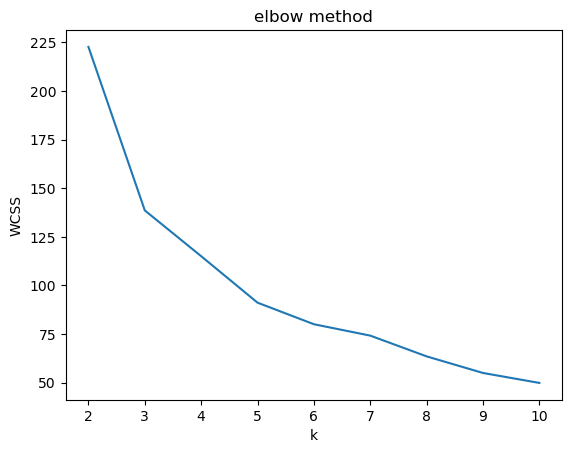

In [37]:
plt.plot(range(2,11),WCSS)
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('elbow method')

In [55]:
# retrain the model
model1 = KMeans(n_clusters = 3, random_state = 10)
model1.fit(x) #fitting on x data

KMeans(n_clusters=3, random_state=10)

In [39]:
model1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2])

<Axes: xlabel='petal_length', ylabel='petal_width'>

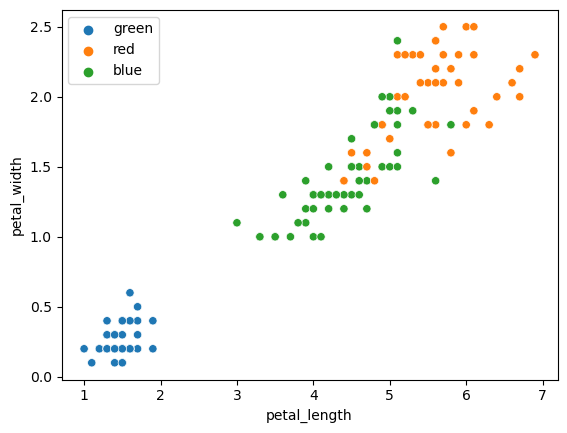

In [40]:
color = np.array(['red','green','blue'])
sns.scatterplot(x= data.petal_length,y = data.petal_width,hue=color[model1.labels_])

In [41]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,model1.labels_) # its vakue going 1 to 1 thats why its near to this
score 

0.4592743735701458

The range of Silhouette score is [-1, 1]. Its analysis is as follows −

+1 Score − Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster.

0 Score − 0 Silhouette score indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.

-1 Score − 1 Silhouette score indicates that the samples have been assigned to the wrong clusters.

The calculation of Silhouette score can be done by using the following formula

$$silhouette score\:=\:(p-q)/max(p,q)$$

Here, p = mean distance to the points in the nearest cluster

And, q = mean intra-cluster distance to all the points.

### Applications
The scikit-learn book describes the various applications of clustering as follows:

* __For customer segmentation:__ You can cluster your customers based on their purchases,their activity on your website, and so on. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, this can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.Subdivision of customers into groups/segments such that each customer segment consists of customers with similar market characteristics — pricing , loyalty, spending behaviors etc. Some of the segmentation variables could be e.g., number of items bought on sale, avg transaction value, total number of transactions. Customer segmentation allows businesses to customize market programs that will be suitable for each of its customer segments

* __For data analysis:__ When analyzing a new dataset, it is often useful to first discover clusters of similar instances, as it is often easier to analyze clusters separately.

* __Inventory Categorization based on sales or other manufacturing metrics.

* __For anomaly detection (also called outlier detection):__ Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second, and so on. Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection.


* __For search engines:__ For example, some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database: similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is to find this image’s cluster using the trained clustering model, and you can then simply return all the images from this cluster.

* __To segment an image:__ By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to reduce the number of different colors in the image considerably. This technique is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.


##### Approaches for Clustering:
The clustering approaches can be broadly divided into two categories: _Agglomerative_ and _Divisive_.

**Agglomerative:** This approach first considers all the points as individual clusters and then finds out the similarity between two points, puts them into a cluster. Then it goes on finding similar points and clusters until there is only one cluster left i.e., all points belong to a big cluster. This is also called the bottom-up approach.

**Divisive:** It is opposite of the agglomerative approach. It first considers all the points to be part of one big cluster and in the subsequent steps tries to find out the points/ clusters which are least similar to each other and then breaks the bigger cluster into smaller ones. This continues until there are as many clusters as there are datapoints. This is also called the top-down approach.

### Assumption of K Means:
- Clusters are spatially grouped or spherical
- All features are scaled
- Clusters are of similar size

### Pros:
- Works well even when some assumptions are broken
- Simple and easy to implement
- Easy to interpret

### Cons:

- Sensitive to outliers
- k value has to be known before

### Goal of Clustering

- Distance between centroid and its point should be minimum
- Intra-cluster distance should be less
- Distance between intercluster should be high